In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import os
import warnings

warnings.filterwarnings('ignore')
os.chdir("C:/Users/project/competitions/24-LG-Aimers-Phase2")

import Experiments.preprocessing as pp

In [2]:
df = pd.read_csv("Experiments/Data/train.csv")
tr_data = df.drop_duplicates()
tt_data = pd.read_csv("Experiments/Data/submission.csv")

In [3]:
print(f'duplicated data: {len(df) - len(tr_data)}')

duplicated data: 3519


---

In [4]:
tr_data.describe(include='all')

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
count,55780.000000,54806,55780,14114.000000,55780.000000,14422,55780,12370.000000,3339.0,1108.0,...,55780,27488,55780.000000,55780.000000,17787.000000,14884.000000,17787,5180,55780.000000,55780
unique,NaN,15399,5,NaN,NaN,33,2,NaN,NaN,NaN,...,53,449,NaN,NaN,NaN,NaN,12,86,NaN,2
top,NaN,//India,ID,NaN,NaN,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,NaN,NaN,NaN,NaN,corporate / office,Others,NaN,False
freq,NaN,2956,24863,NaN,NaN,6552,35638,NaN,NaN,NaN,...,16684,16768,NaN,NaN,NaN,NaN,3989,1585,NaN,51160
mean,0.644232,NaN,NaN,0.086285,26958.289190,NaN,NaN,20.180113,1.0,1.0,...,NaN,NaN,0.042668,0.052582,0.001125,0.049105,NaN,NaN,259.623969,NaN
std,0.282902,NaN,NaN,0.141274,14594.626261,NaN,NaN,45.469355,0.0,0.0,...,NaN,NaN,0.202108,0.223199,0.001105,0.027765,NaN,NaN,229.706680,NaN
min,0.000000,NaN,NaN,0.003788,2.000000,NaN,NaN,0.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000002,0.011583,NaN,NaN,0.000000,NaN
25%,0.500000,NaN,NaN,0.019900,14799.000000,NaN,NaN,1.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000298,0.026846,NaN,NaN,97.000000,NaN
50%,0.500000,NaN,NaN,0.049180,26510.500000,NaN,NaN,4.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.000572,0.049840,NaN,NaN,175.000000,NaN
75%,1.000000,NaN,NaN,0.074949,40026.250000,NaN,NaN,19.000000,1.0,1.0,...,NaN,NaN,0.000000,0.000000,0.001183,0.064566,NaN,NaN,363.000000,NaN


In [5]:
for col in tr_data.columns:
    print(col)
    print(tr_data[col].unique())
    print('-' * 20)

bant_submit
[1.   0.75 0.5  0.25 0.  ]
--------------------
customer_country
['/Quezon City/Philippines' '/PH-00/Philippines' '/Kolkata /India' ...
 '/Pisco/Peru' '/santa cruz bolivia/Peru' '/paris/France']
--------------------
business_unit
['AS' 'ID' 'IT' 'Solution' 'CM']
--------------------
com_reg_ver_win_rate
[0.06666667 0.08888889 0.04081633 0.00393701        nan 0.05753425
 0.075      0.04464286 0.08433735 0.0199005  0.07494867 0.04347826
 0.03119584 0.14705882 0.03305785 0.08069164 0.33333333 0.04310345
 0.11627907 0.01351351 0.04854369 0.01818182 0.01185771 0.21428571
 0.3902439  0.03225806 0.01754386 0.03278689 0.05555556 0.01515152
 0.46153846 0.06818182 0.08333333 0.26923077 0.18181818 0.23076923
 0.64285714 0.16666667 0.01724138 0.05389222 0.04968944 0.01098901
 0.06779661 0.03703704 0.00378788 0.36363636 0.10526316 0.61538462
 0.08695652 0.05442177 0.05319149 0.07142857 0.04       0.04166667
 0.02892562 0.11842105 0.04918033 0.11864407 0.07324841 0.02898551
 0.01960784 0

---

<Axes: >

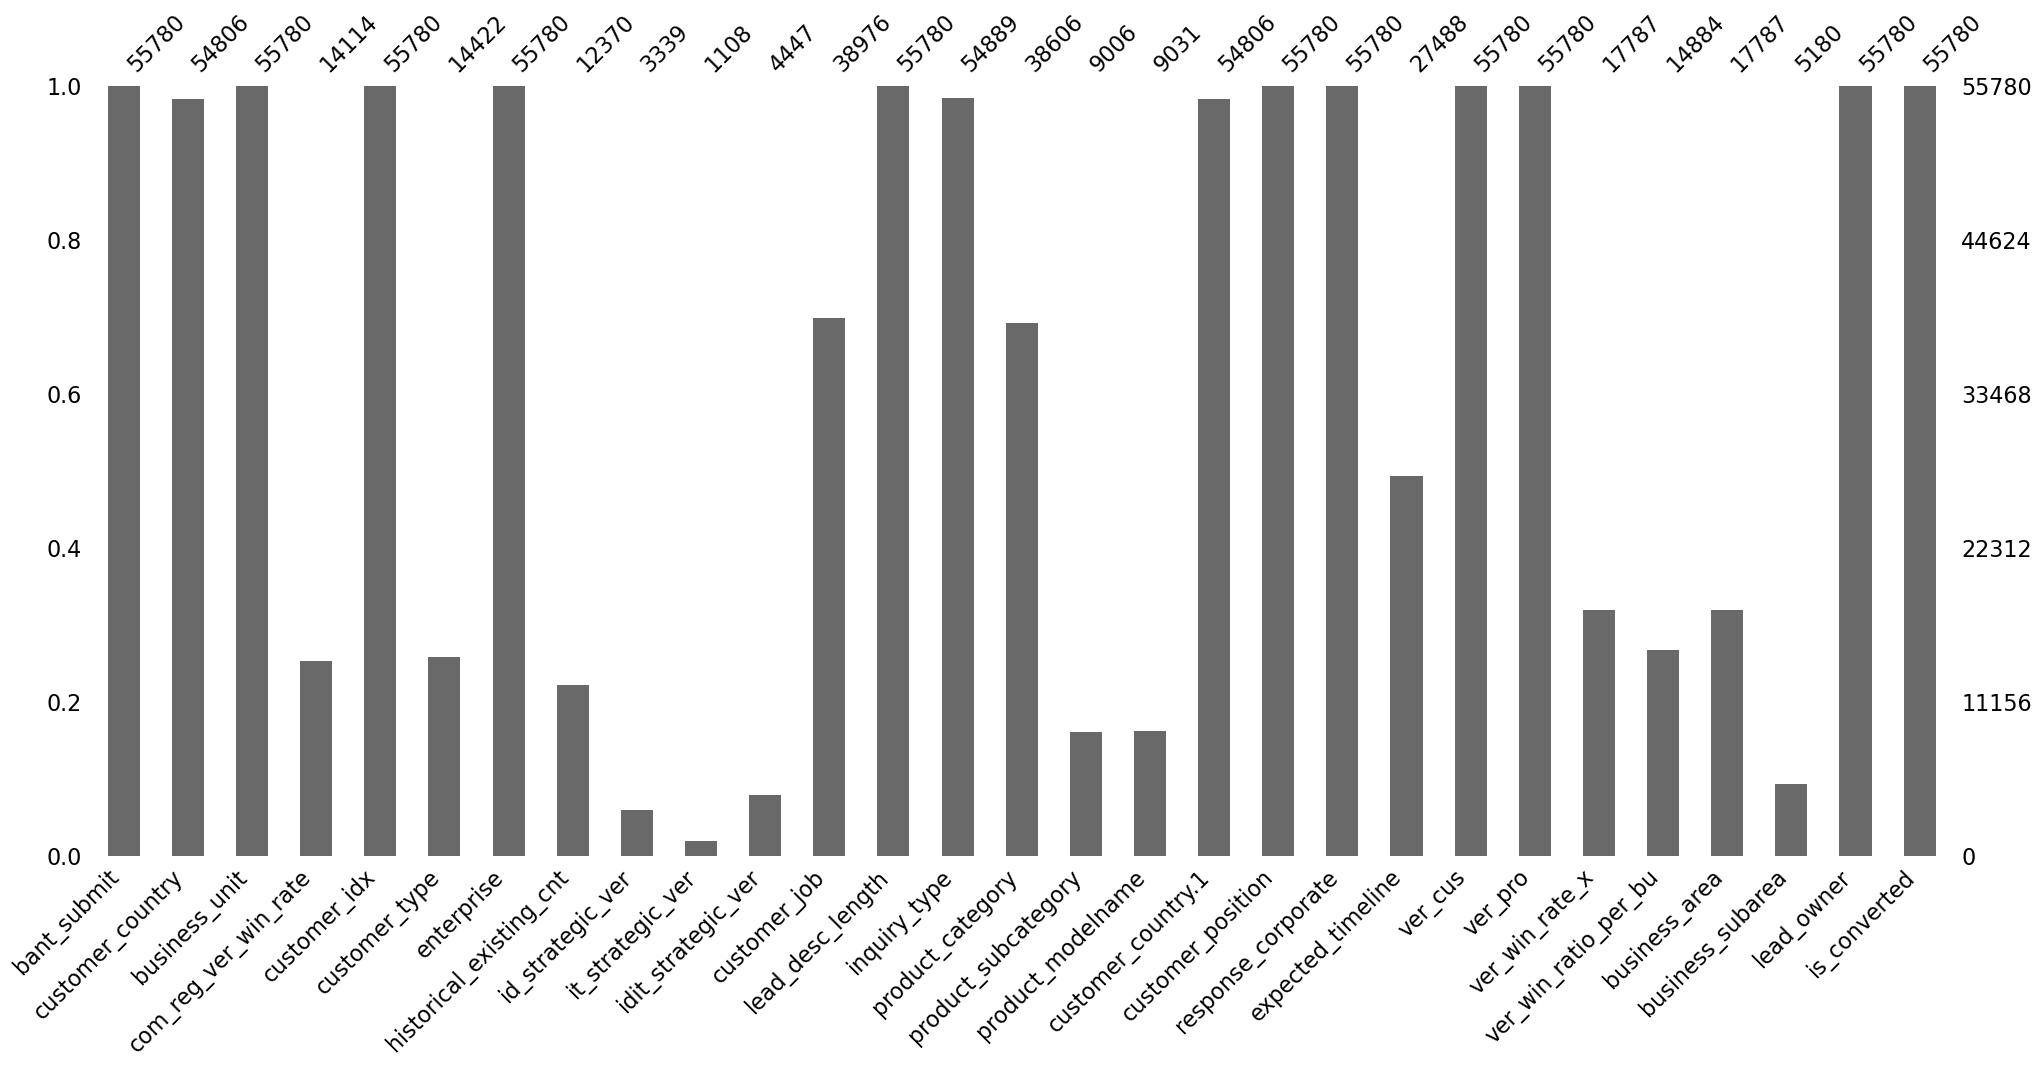

In [6]:
msno.bar(tr_data)

In [7]:
tmp = pd.DataFrame(tr_data.isna().sum() / len(tr_data), columns=['nan_ratio'])
high_nan_features = tmp[tmp['nan_ratio'] >= 0.5].index.values
tmp

,nan_ratio
bant_submit,0.000000
customer_country,0.017461
business_unit,0.000000
com_reg_ver_win_rate,0.746970
customer_idx,0.000000
customer_type,0.741449
enterprise,0.000000
historical_existing_cnt,0.778236
id_strategic_ver,0.940140
it_strategic_ver,0.980136


- 대부분의 features에 대한 전처리 (cleansing, label encoding, transformation, etc.) 가 필요할 것으로 보인다.

is_converted
False    51160
True      4620
Name: count, dtype: int64


<Axes: xlabel='is_converted', ylabel='count'>

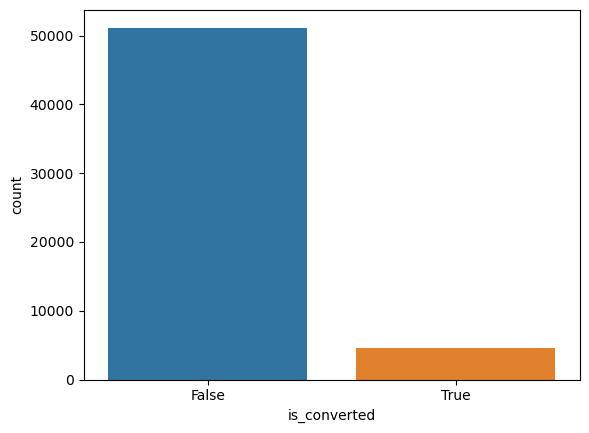

In [8]:
print(tr_data['is_converted'].value_counts())
sns.countplot(x='is_converted', data=tr_data)

### Feature 별 positive / negative samples 분포 확인

In [9]:
enc_tr_data, enc_tt_data = pp.label_encoding(tr_data, tt_data)

In [10]:
is_converted = enc_tr_data[enc_tr_data['is_converted'] == True]
not_converted = enc_tr_data[enc_tr_data['is_converted'] == False]

1. `bant_submit` -> 그대로 사용

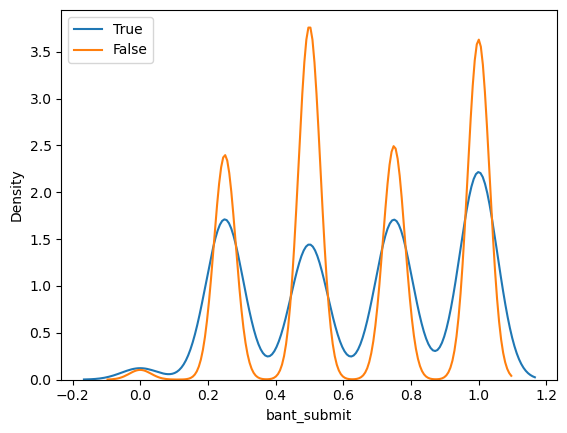

In [11]:
sns.kdeplot(is_converted['bant_submit'], label='True')
sns.kdeplot(not_converted['bant_submit'], label='False')
plt.legend()

- True, False 데이터 간에 분포 차이가 크지 않다.
- `budget`에 대한 값을 역으로 구해보았으나, True / False 간 분포 차이가 존재하지 않았다.

2. `customer_country` -> 국가명 추출

In [12]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.extract_country_name(tr_data_cp, tt_data_cp)
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['country'])

In [13]:
is_cvt, not_cvt = tr_data_cp[tr_data_cp['is_converted'] == True], tr_data_cp[tr_data_cp['is_converted'] == False]

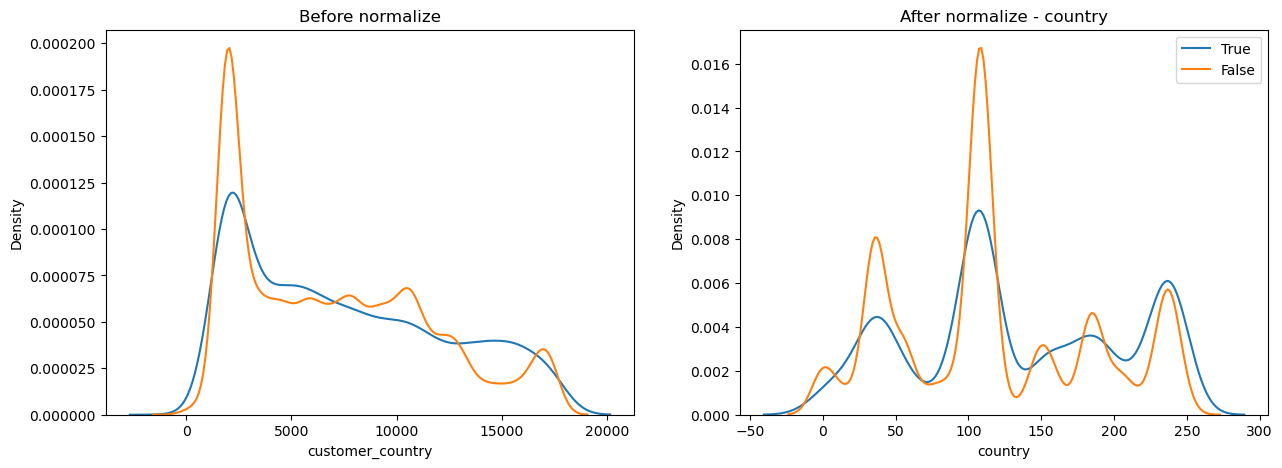

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(is_converted['customer_country'], ax=ax[0])
sns.kdeplot(not_converted['customer_country'], ax=ax[0])
ax[0].set_title('Before normalize')

sns.kdeplot(is_cvt['country'], ax=ax[1])
sns.kdeplot(not_cvt['country'], ax=ax[1])
ax[1].set_title('After normalize - country')

plt.legend(['True', 'False'])

- `customer_country` feature에서 `country`에 대한 정보만 추출하여 사용한다.
- `customer_country` feature는 삭제하고, correlation이 높은 `customer_country.1` feature 또한 삭제한다.

3. `business_unit` -> 그대로 사용

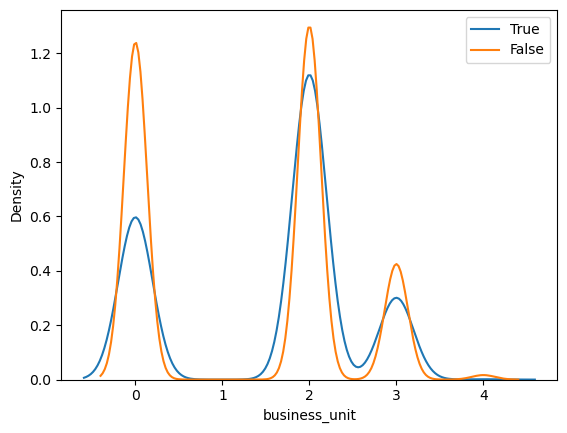

In [15]:
sns.kdeplot(is_converted['business_unit'], label='True')
sns.kdeplot(not_converted['business_unit'], label='False')
plt.legend()

4. `com_reg_ver_win_rate` -> log1p transformation

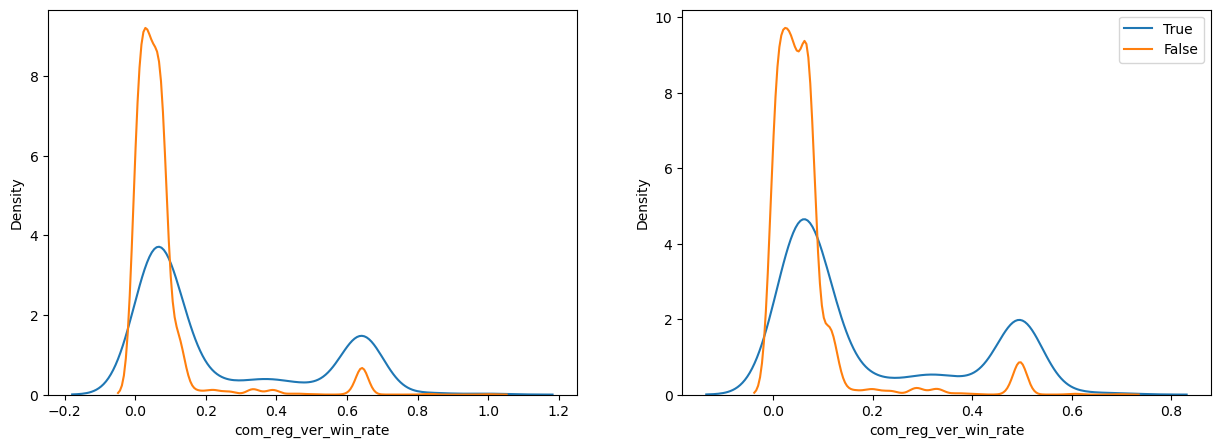

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(is_converted['com_reg_ver_win_rate'], label='True', ax=ax[0])
sns.kdeplot(not_converted['com_reg_ver_win_rate'], label='False', ax=ax[0])


sns.kdeplot(np.log1p(is_converted['com_reg_ver_win_rate']), label='True', ax=ax[1])
sns.kdeplot(np.log1p(not_converted['com_reg_ver_win_rate']), label='False', ax=ax[1])
plt.legend()

5. `customer_idx` -> binning

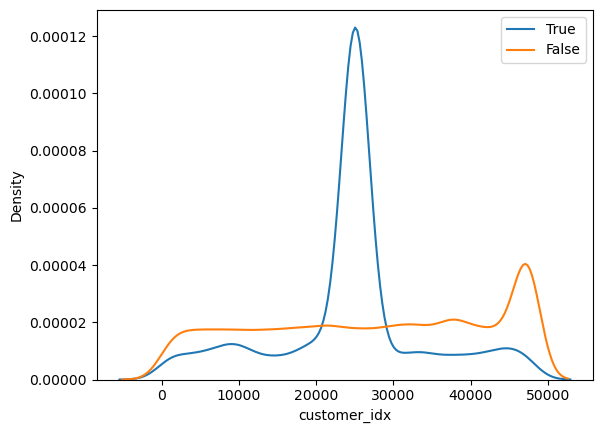

In [17]:
sns.kdeplot(is_converted['customer_idx'], label='True')
sns.kdeplot(not_converted['customer_idx'], label='False')
plt.legend()

- 상당한 분포 차이를 보이기는 하나, index 값이 너무 다양하기 때문에 overfitting의 소지가 다분하다.
- binning을 통해 이러한 문제를 해소해보고자 한다.

In [18]:
start, stop, step = 0, 47501, 100

In [19]:
bins = np.arange(start, stop, step)
labels = [i for i in range(len(bins) - 1)]
tmp = pd.DataFrame(pd.cut(tr_data['customer_idx'], bins=bins, labels=labels), dtype='int64')

<Axes: xlabel='customer_idx', ylabel='Density'>

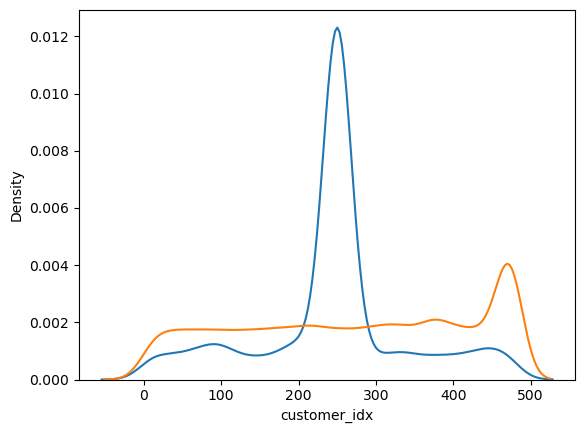

In [20]:
tmp['is_converted'] = tr_data['is_converted']
sns.kdeplot(tmp[tmp['is_converted'] == True]['customer_idx'])
sns.kdeplot(tmp[tmp['is_converted'] == False]['customer_idx'])

6. `customer_type` -> regrouping

- 결측치 비율이 높으며 (0.74), 중복되는 유형이 존재한다.
- 중복되는 유형을 하나로 합치고, 결측치를 어떻게 채울지 고민해보아야 한다.

In [21]:
regroup_customer_type = [['End-Customer', 'End Customer', 'End-user', 'Commercial end-user'],
                         ['Specifier / Influencer', 'Specifier/ Influencer'],
                         ['Distributor', 'Dealer/Distributor'],
                         ['Installer', 'Installer/Contractor'],
                         ['Homeowner', 'Home Owner'],
                         ['Others', 'other', 'Etc.', 'Other']]

In [22]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'customer_type', regroup_customer_type, except_val='others', except_thr=5)

In [23]:
tr_data_cp['customer_type'].value_counts()

customer_type
end-customer                  10106
specifier / influencer         2366
Channel Partner                1282
Service Partner                 316
Solution Eco-Partner            128
installer                        47
others                           38
Corporate                        28
Engineer                         18
HVAC Engineer                    17
Technician                       16
Consultant                       15
Developer                        14
homeowner                        11
Manager / Director                7
Software/Solution Provider        7
distributor                       6
Name: count, dtype: int64

In [24]:
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['customer_type'])

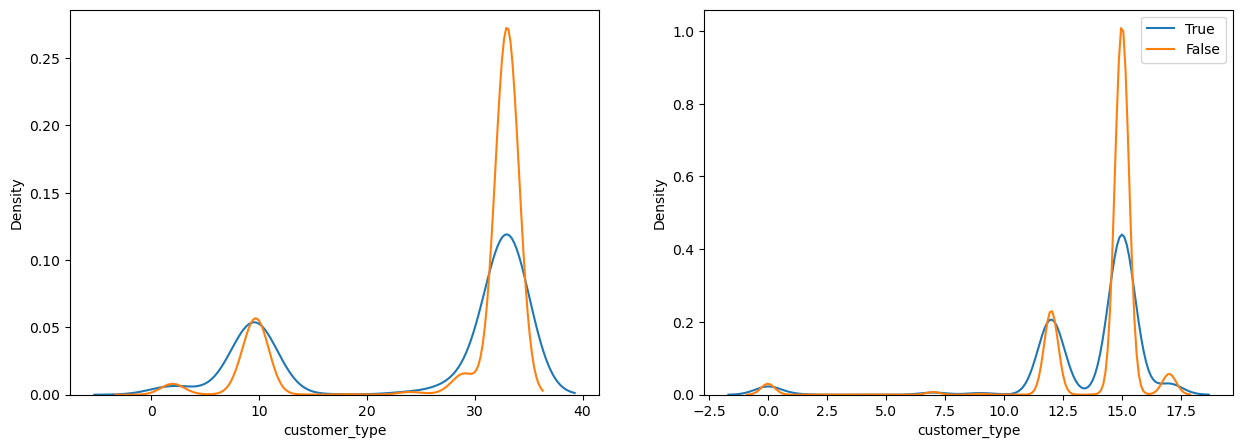

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(is_converted['customer_type'], label='True', ax=ax[0])
sns.kdeplot(not_converted['customer_type'], label='False', ax=ax[0])

sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['customer_type'], label='True', ax=ax[1])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['customer_type'], label='False', ax=ax[1])
plt.legend()

- 분포의 변화는 별로 없었음.
- 실험 결과 f1 score가 소폭 하락하였음.

7. `enterprise` -> 그대로 사용

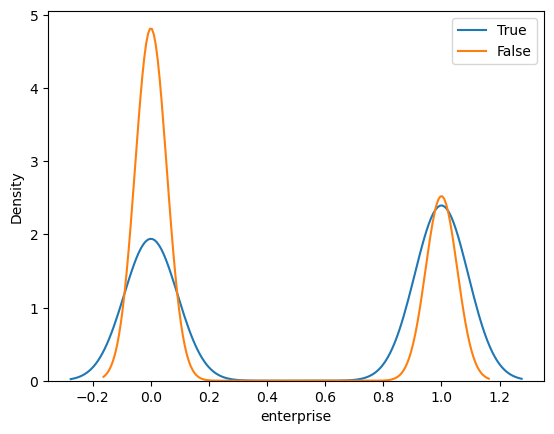

In [26]:
sns.kdeplot(is_converted['enterprise'], label='True')
sns.kdeplot(not_converted['enterprise'], label='False')
plt.legend()

8. `historical_existing_cnt` -> log1p transformation

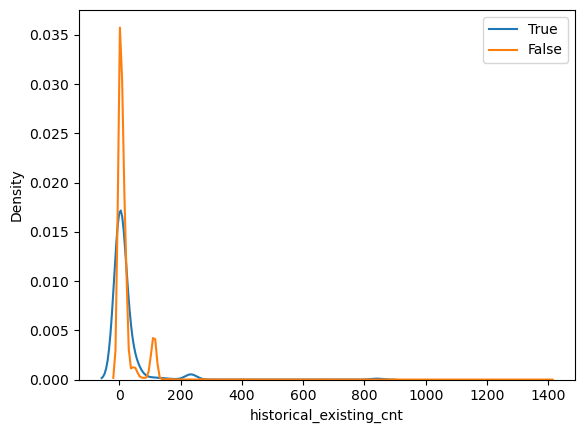

In [27]:
sns.kdeplot(is_converted['historical_existing_cnt'], label='True')
sns.kdeplot(not_converted['historical_existing_cnt'], label='False')
plt.legend()

- 결측치 비율이 높고 (0.76), skewed distribution 모습을 보이고 있다.
- Distribution transformation을 통해 분포를 완만하게 바꾸어본다.

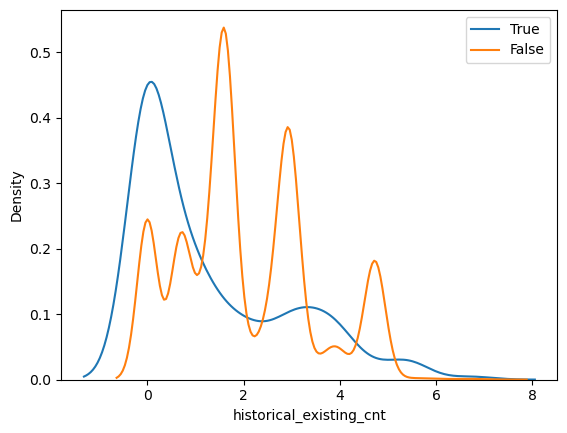

In [28]:
sns.kdeplot(np.log1p(is_converted['historical_existing_cnt']), label='True')
sns.kdeplot(np.log1p(not_converted['historical_existing_cnt']), label='False')
plt.legend()

- best f1 score와 동일한 score 기록 (영향 X)

9. `id_strategic_ver`, `it_strategic_ver`, `idit_strategic_ver` -> `idit_strategic_ver`만 사용

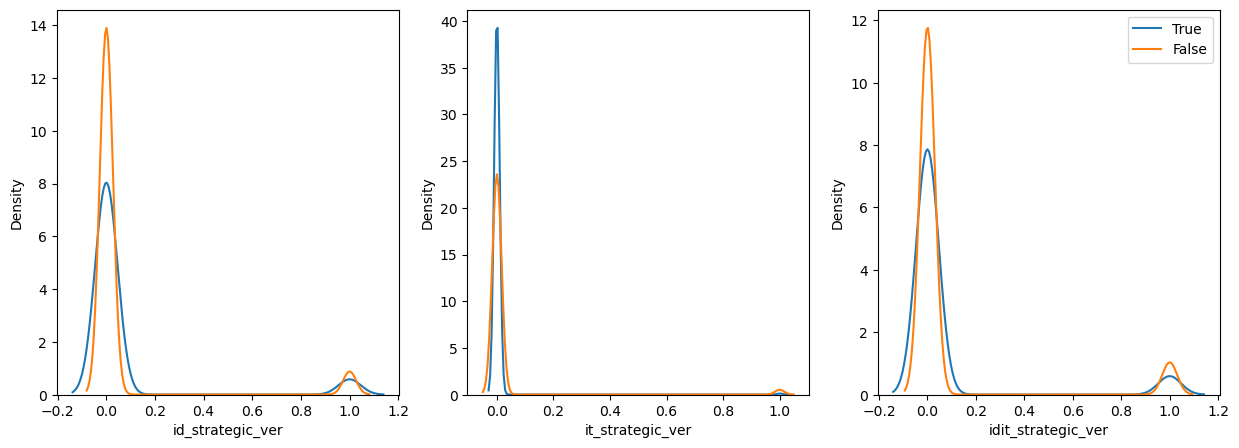

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(is_converted['id_strategic_ver'].fillna(0), label='True', ax=ax[0])
sns.kdeplot(not_converted['id_strategic_ver'].fillna(0), label='False', ax=ax[0])

sns.kdeplot(is_converted['it_strategic_ver'].fillna(0), label='True', ax=ax[1])
sns.kdeplot(not_converted['it_strategic_ver'].fillna(0), label='False', ax=ax[1])

sns.kdeplot(is_converted['idit_strategic_ver'].fillna(0), label='True', ax=ax[2])
sns.kdeplot(not_converted['idit_strategic_ver'].fillna(0), label='False', ax=ax[2])
plt.legend()

- 세 feature 모두 결측치 비율이 90% 이상이고, 서로 correlation이 높음
- `idit_strategic_ver` 같은 경우 `id_strategic_ver`과 `it_strategic_ver` 중 하나라도 1이면 1인 feature로, 중복되는 감이 있음.
- 따라서 `idit_strategic_ver`을 제외한 나머지 feature는 삭제하는 것을 고려

10. `customer_job` -> regroup

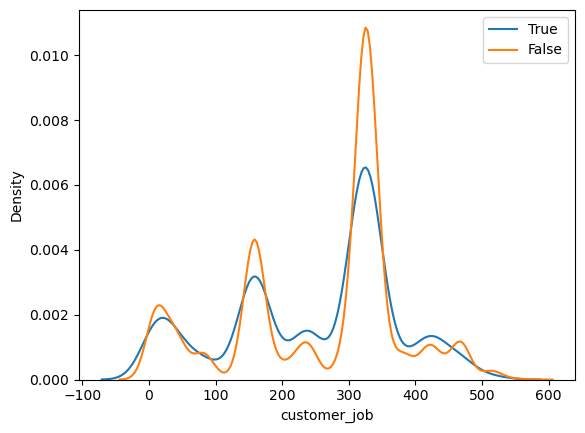

In [30]:
sns.kdeplot(is_converted['customer_job'], label='True')
sns.kdeplot(not_converted['customer_job'], label='False')
plt.legend()

In [31]:
regroup_customer_job = [['engineering', 'engineering & technical', 'technical', 'engineer', 'chief engineer', 'engineering & technical executive'],
                        ['others', 'other'],
                        ['information technology', 'information_technology'],
                        ['operations', 'operations manager'],
                        ['business development', 'business_development'],
                        ['art and design', 'arts and design', 'kreation_und_design', 'designer', 'arts_and_design'],
                        ['program and project management', 'programm-_und_projektmanagement', 'program_and_project_management', 'projektmenedzsment\tprogram and project management', 'manager', 'project manager', 'general manager', 'it manager', 'operations manager', 'sales manager'],
                        ['media and communication', 'media_e_comunicazione'],
                        ['healthcare services', 'healthcare_services'],
                        ['community and social services', 'community_and_social_services'],
                        ['research', 'research & development'],
                        ['surgery professional', 'surgery professional\u200b'],
                        ['quality_assurance', 'quality_assurance'],
                        ['director', 'it director', 'it', 'director of it'],
                        ['ceo/founder', 'ceo'],
                        ['architect', 'arquitecto/consultor'],
                        ['finance', 'finanzen'],
                        ['integrator', 'integrador'],
                        ['coordinator', 'project coordinator'],
                        ['administrative', 'administrative assistant']]

tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'customer_job', regroup_customer_job, 'others', 5)

In [32]:
list(tr_data_cp['customer_job'].value_counts().items())

[('engineering', 6074),
 ('others', 5788),
 ('administrative', 3285),
 ('education', 2260),
 ('sales', 2138),
 ('information technology', 1906),
 ('purchasing', 1896),
 ('operations', 1880),
 ('business development', 1741),
 ('consulting', 1305),
 ('art and design', 1292),
 ('entrepreneurship', 1161),
 ('marketing', 1101),
 ('program and project management', 1058),
 ('media and communication', 690),
 ('healthcare services', 615),
 ('product management', 552),
 ('finance', 463),
 ('accounting', 388),
 ('support', 346),
 ('graphic/color art', 318),
 ('real estate', 290),
 ('film production', 237),
 ('3d/vfx art', 230),
 ('clinical specialist', 216),
 ('radiology professional', 204),
 ('medical imaging specialist', 191),
 ('legal', 149),
 ('medical solution provider', 142),
 ('community and social services', 140),
 ('research', 133),
 ('surgery professional', 122),
 ('human resources', 107),
 ('military and protective services', 81),
 ('owner', 57),
 ('pathologist', 47),
 ('curation', 42)

<Axes: xlabel='customer_job', ylabel='Density'>

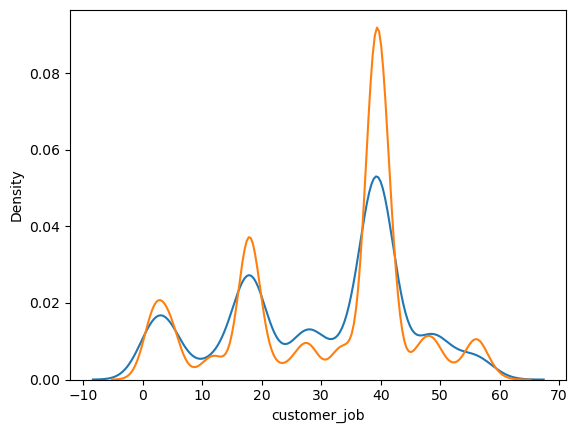

In [33]:
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['customer_job'])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['customer_job'])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['customer_job'])

11. `lead_desc_length` -> `log1p` transformation

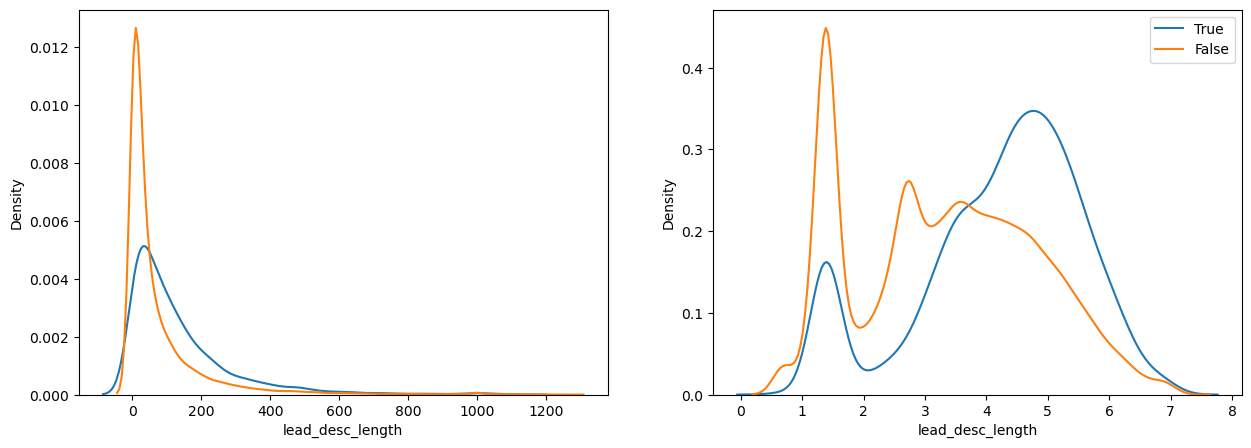

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(is_converted['lead_desc_length'], label='True', ax=ax[0])
sns.kdeplot(not_converted['lead_desc_length'], label='False', ax=ax[0])

sns.kdeplot(np.log1p(is_converted['lead_desc_length']), label='True', ax=ax[1])
sns.kdeplot(np.log1p(not_converted['lead_desc_length']), label='False', ax=ax[1])
plt.legend()

- log transformation을 적용하는 것이 좋아보인다.

12. `inquiry_type` -> regrouping

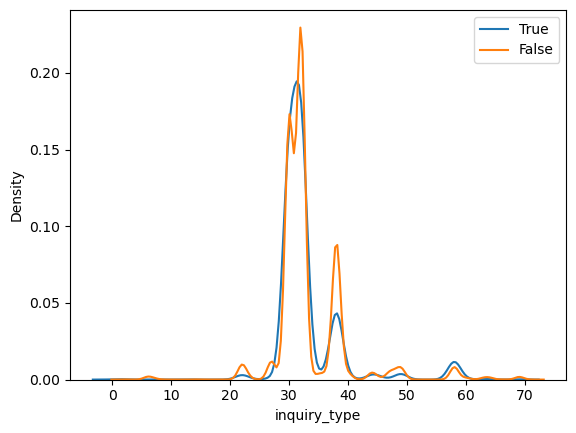

In [35]:
sns.kdeplot(is_converted['inquiry_type'], label='True')
sns.kdeplot(not_converted['inquiry_type'], label='False')
plt.legend()

In [36]:
regroup_inquiry_type = [['Quotation or purchase consultation', 'Quotation or Purchase Consultation', 'quotation_or_purchase_consultation', 'Quotation or Purchase consultation', 'quotation_', 'Request for quotation or purchase', 'Purchase or Quotation', 'Purchase'],
                        ['Sales Inquiry', 'sales', 'Sales inquiry'],
                        ['Usage or technical consultation', 'Technical Consultation', 'Usage or Technical Consultation', 'usage or technical consultation', 'usage_or_technical_consultation', 'technical_consultation', 'Technical Support', 'Request for technical consulting', 'technical'],
                        ['Others', 'Other', 'ETC.', 'ETC.', 'Etc.', 'others', 'other', 'other_']]

In [37]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'inquiry_type', regroup_inquiry_type, 'others', 2)

In [38]:
tr_data_cp['inquiry_type'].value_counts()

inquiry_type
quotation or purchase consultation    40468
sales inquiry                          8948
usage or technical consultation        1690
others                                 1399
Product Information                    1100
Trainings                               376
Services                                361
Request for Partnership                 273
Request a Demo                          174
Request for Distributorship              67
Customer Suggestions                     12
IDB                                      10
OEM/ODM Request                           5
Event Inquiry                             4
Media Inquiry                             2
Name: count, dtype: int64

In [39]:
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['inquiry_type'])

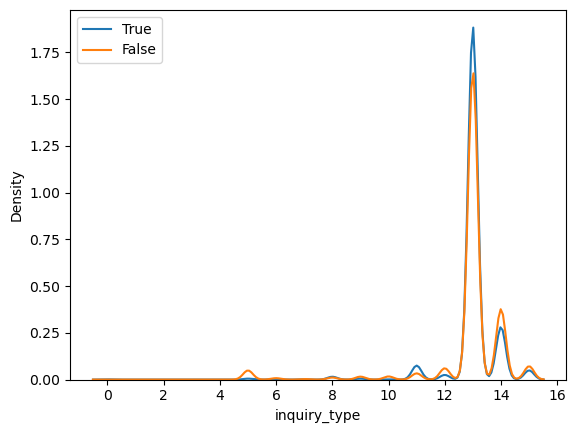

In [40]:
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['inquiry_type'], label='True')
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['inquiry_type'], label='False')
plt.legend()

13. `product_category`, `product_subcategory`, `product_modelname` -> `product_modelname` 삭제

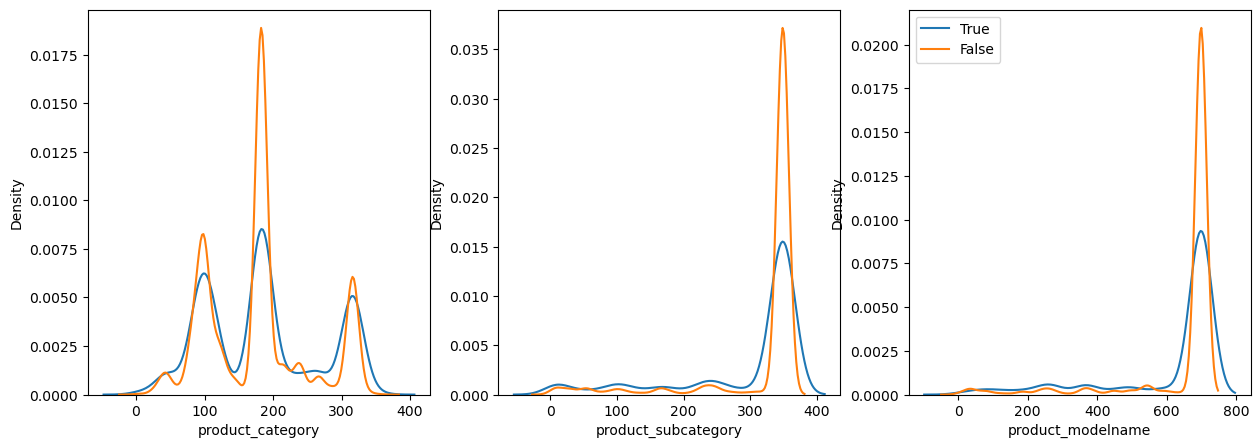

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.kdeplot(is_converted['product_category'].fillna(0), label='True', ax=ax[0])
sns.kdeplot(not_converted['product_category'].fillna(0), label='False', ax=ax[0])

sns.kdeplot(is_converted['product_subcategory'].fillna(0), label='True', ax=ax[1])
sns.kdeplot(not_converted['product_subcategory'].fillna(0), label='False', ax=ax[1])

sns.kdeplot(is_converted['product_modelname'].fillna(0), label='True', ax=ax[2])
sns.kdeplot(not_converted['product_modelname'].fillna(0), label='False', ax=ax[2])
plt.legend()

- `product_subcategory`와 `product_modelname` 간에는 corrleation이 존재해서, `product_modelname`을 삭제하는 것을 고려

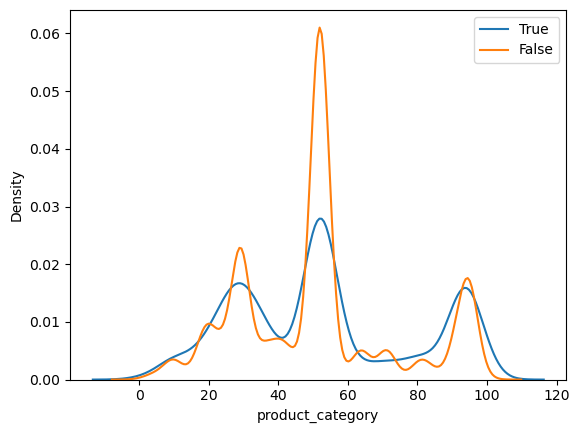

In [60]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'product_category', [[]], 'etc.', 5)
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['product_category'])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['product_category'], label='True')
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['product_category'], label='False')
plt.legend()

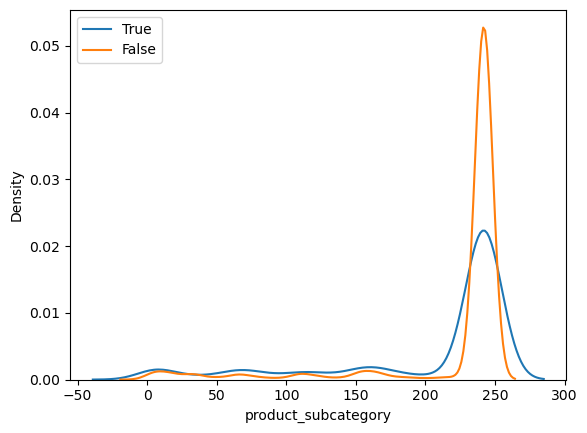

In [70]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'product_subcategory', [[]], 'others.', 1)
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['product_subcategory'])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['product_subcategory'], label='True')
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['product_subcategory'], label='False')
plt.legend()

14. `customer_country.1` -> 삭제

- `customer_country`와 correlation이 매우 높음

15. `customer_position` -> regrouping or 그대로 사용

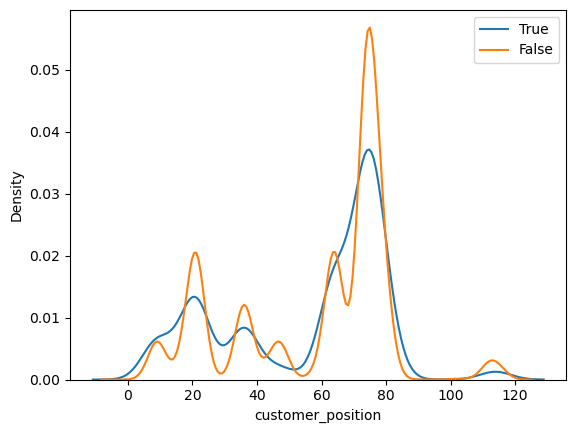

In [42]:
sns.kdeplot(is_converted['customer_position'], label='True')
sns.kdeplot(not_converted['customer_position'], label='False')
plt.legend()

In [43]:
regroup_customer_position = [['others', 'other'],
                             ['entry level', 'entrylevel'],
                             ['c-level executive', 'c-levelexecutive'],
                             ['vice president', 'vicepresident'],
                             ['end-user', 'commercial end-user'],
                             ['decision maker', 'decision-maker'],
                             ['decision influencer', 'decision-influencer']]

In [44]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'customer_position', regroup_customer_position, 'others', 6)

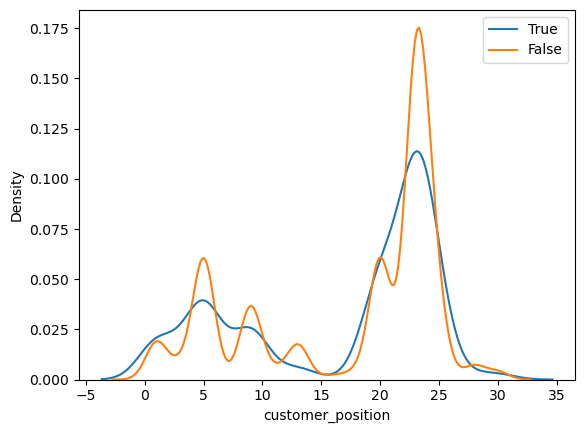

In [45]:
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['customer_position'])
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['customer_position'], label='True')
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['customer_position'], label='False')
plt.legend()

16. `response_corporate` -> 그대로 사용

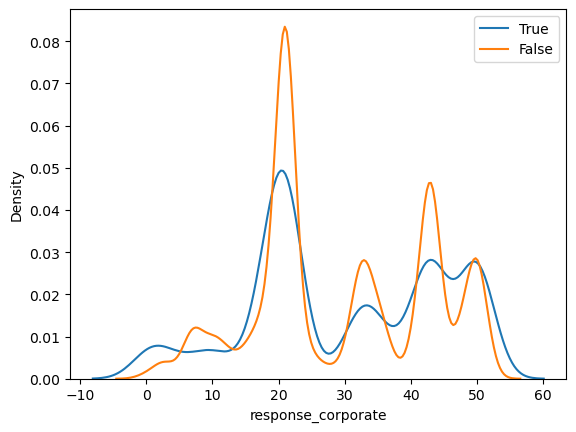

In [46]:
sns.kdeplot(is_converted['response_corporate'], label='True')
sns.kdeplot(not_converted['response_corporate'], label='False')
plt.legend()

17. `expected_timeline` -> regrouping & outlier 삭제

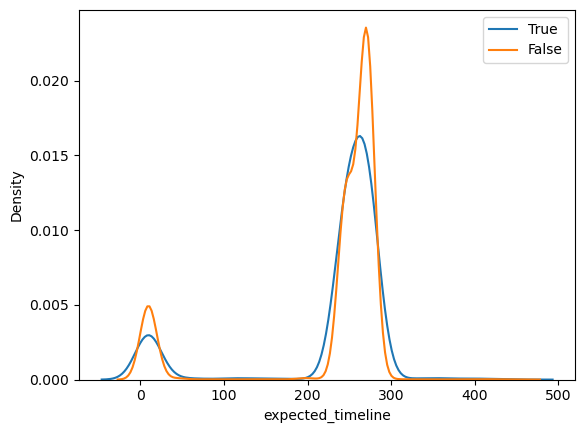

In [47]:
sns.kdeplot(is_converted['expected_timeline'], label='True')
sns.kdeplot(not_converted['expected_timeline'], label='False')
plt.legend()

In [48]:
regroup_expected_timeline = [['less than 3 months', 'less_than_3_months'],
                             ['3 months ~ 6 months', '3_months_~_6_months'],
                             ['less than 6 months'],
                             ['6 months ~ 9 months', '6_months_~_9_months'],
                             ['more than a year'],
                             ['being followed up', 'being followed up.'],
                             ['no requirement', 'the client is not having any requirement hence closig in system. although the details of idb are mailed to client.']]

In [49]:
tr_data_cp, tt_data_cp = tr_data.copy(), tt_data.copy()
tr_data_cp, tt_data_cp = pp.regroup(tr_data_cp, tt_data_cp, 'expected_timeline', regroup_expected_timeline, 'others', 1)

In [50]:
tr_data_cp, tt_data_cp = pp.label_encoding(tr_data_cp, tt_data_cp, features=['expected_timeline'])

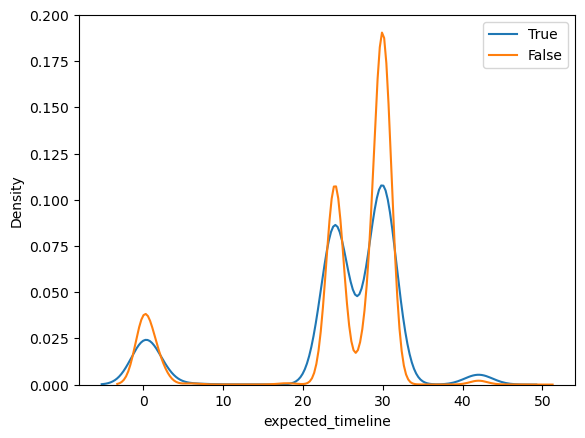

In [51]:
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == True]['expected_timeline'], label='True')
sns.kdeplot(tr_data_cp[tr_data_cp['is_converted'] == False]['expected_timeline'], label='False')
plt.legend()

18. `ver_cus`, `ver_pro`, `ver_win_rate_x`, `ver_win_ratio_per_bu` -> `ver_cus`, `ver_pro` 삭제

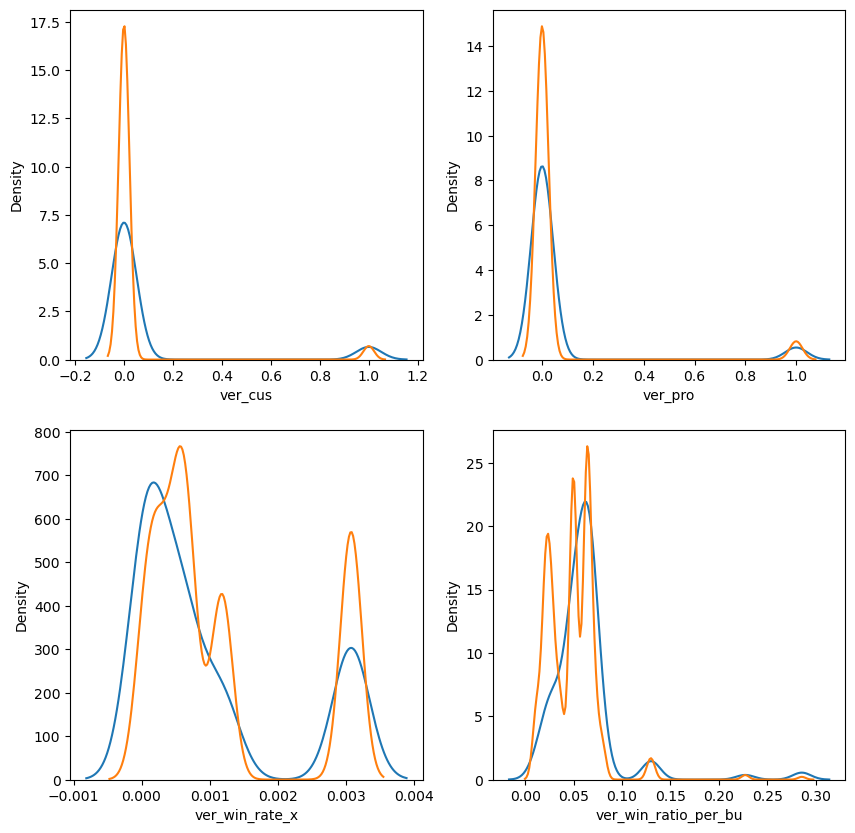

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

cols = ['ver_cus', 'ver_pro', 'ver_win_rate_x', 'ver_win_ratio_per_bu']
cnt = 0
for i in range(2):
    for j in range(2):
        sns.kdeplot(is_converted[cols[cnt]], ax=ax[i][j])
        sns.kdeplot(not_converted[cols[cnt]], ax=ax[i][j])
        cnt += 1

- `ver_cus`와 `ver_pro`는 특정 데이터에만 유의미한 feature라고 판단하여 삭제

19. `business_area`, `business_subarea` -> 그대로 사용

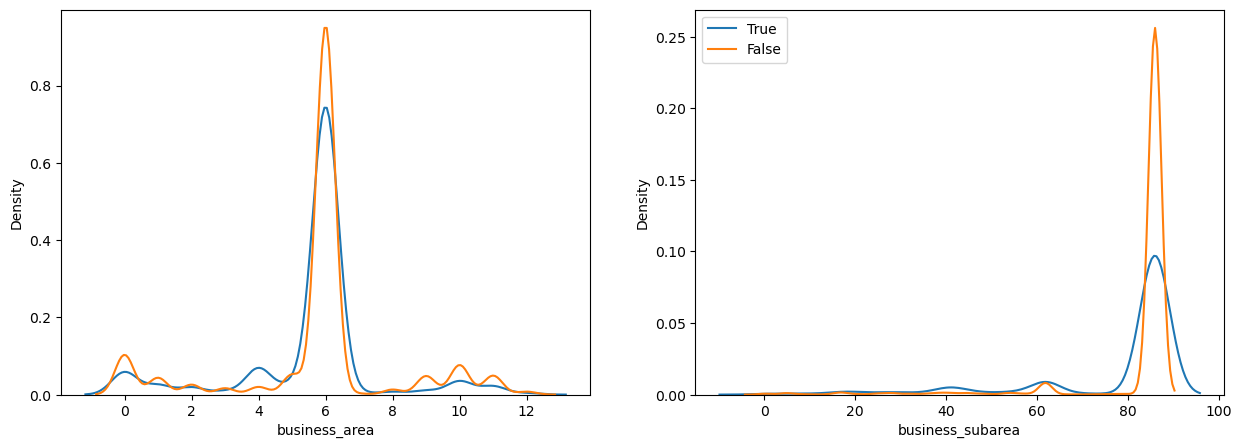

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.kdeplot(is_converted['business_area'], label='True', ax=ax[0])
sns.kdeplot(not_converted['business_area'], label='False', ax=ax[0])

sns.kdeplot(is_converted['business_subarea'], label='True', ax=ax[1])
sns.kdeplot(not_converted['business_subarea'], label='False', ax=ax[1])
plt.legend()

20. `lead_owner` -> 그대로 사용

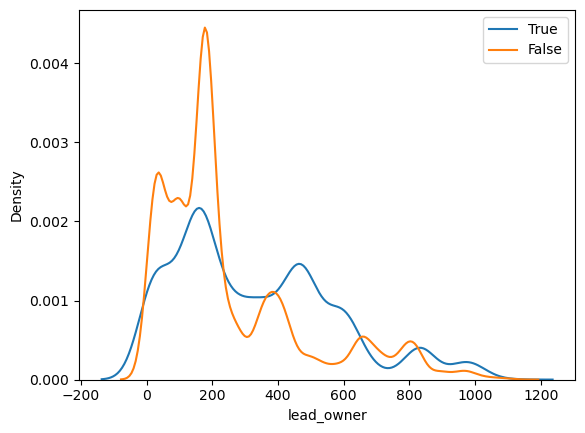

In [54]:
sns.kdeplot(is_converted['lead_owner'], label='True')
sns.kdeplot(not_converted['lead_owner'], label='False')
plt.legend()